In [171]:
import numpy as np
import gmplot
import pandas as pd
import time
from IPython.display import HTML
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt

In [172]:
# Reading file and changing column type to int for desired columns
df = pd.read_csv('large_df_Apr01202222:09:19.csv')
ocurrences_column_names = df.columns.values.tolist()[4:]
for column in ocurrences_column_names:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [173]:
# Total crime ocurrences column
df['Total Ocorrencias'] = df.iloc[:, 4:].sum(axis=1)

# Grouping total ocurrences by PD
df = df.groupby(['DP', 'Coordenadas', 'Ano'])['Total Ocorrencias'].sum().reset_index()

print(df)

                           DP                 Coordenadas   Ano  \
0                 001 DP - Sé  [-23.5569803, -46.6343707]  2001   
1                 001 DP - Sé  [-23.5569803, -46.6343707]  2002   
2                 001 DP - Sé  [-23.5569803, -46.6343707]  2003   
3                 001 DP - Sé  [-23.5569803, -46.6343707]  2004   
4                 001 DP - Sé  [-23.5569803, -46.6343707]  2005   
...                       ...                         ...   ...   
2041  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2018   
2042  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2019   
2043  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2020   
2044  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2021   
2045  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2022   

      Total Ocorrencias  
0              9046.000  
1             11819.000  
2             11115.000  
3             13998.000  
4             14952.006  
...                 ...  
2041         

### Total crime occurences year by year evolution in Sao Paulo

<AxesSubplot:xlabel='Ano'>

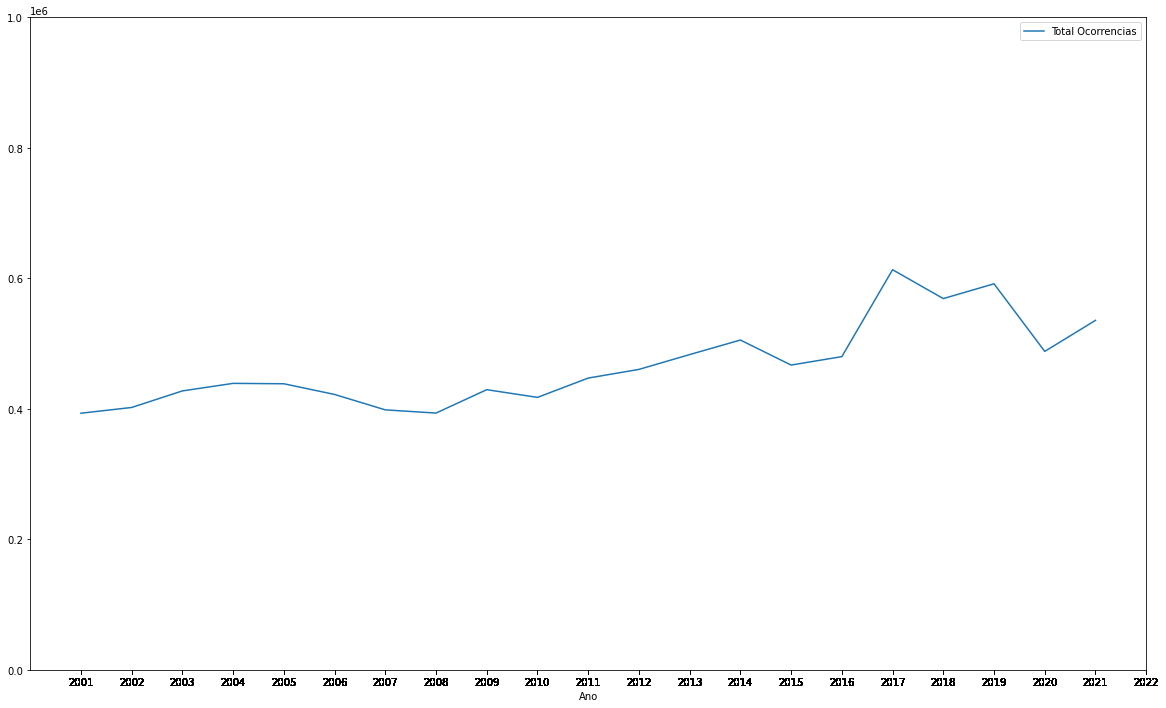

In [174]:
df1 = df.groupby(['Ano'])['Total Ocorrencias'].sum().reset_index()
df1 = df1[:-1]
xint = df['Ano'].to_list()
df1=df1.set_index('Ano')
# print(df1)
df1.plot(figsize=(20,12), xticks=xint, ylim=(0,1000000))

### Total crime occurences police department distribution

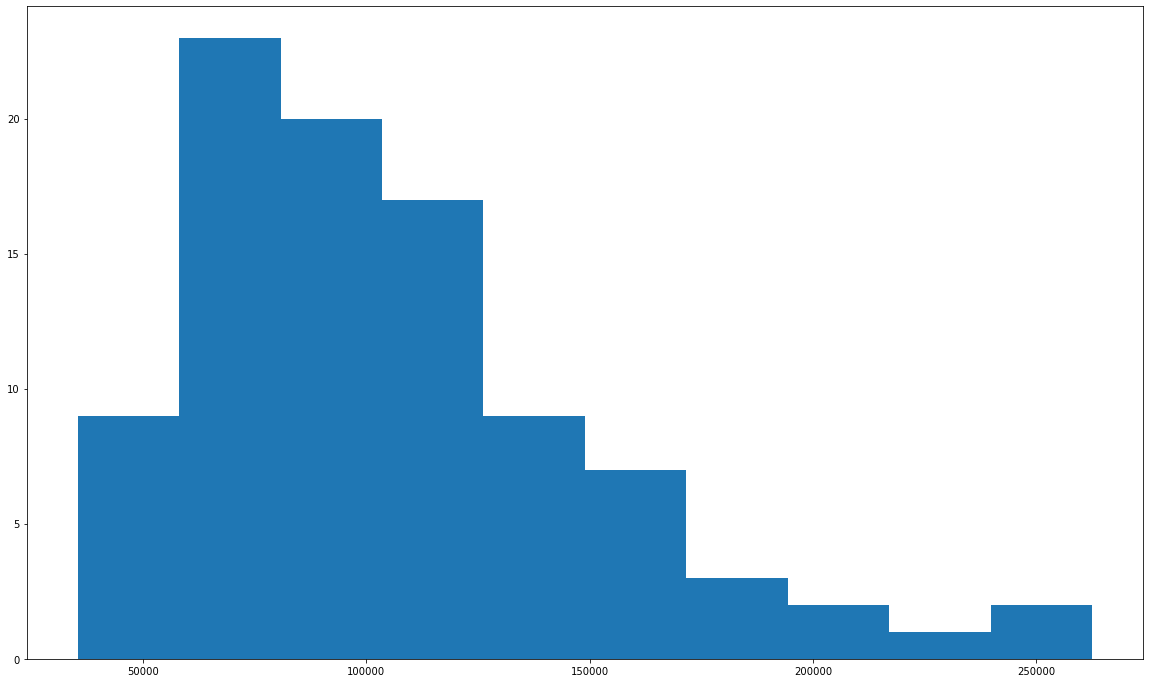

In [175]:
df2 = df.groupby(['DP'])['Total Ocorrencias'].sum().reset_index()
df2['Rank'] = df2['Total Ocorrencias'].rank(ascending=False)
df2 = df2.sort_values(by=['Rank'])
# print(df2)
plt.figure(figsize=(20,12),facecolor='white')
plt.hist(df2['Total Ocorrencias'])
plt.show()

In [176]:
df = df.pivot_table(index='Ano', columns='DP', values='Total Ocorrencias')
df = df[:-1]
# print(df)

### Total crime occurences year by year evolution partitioned by PD

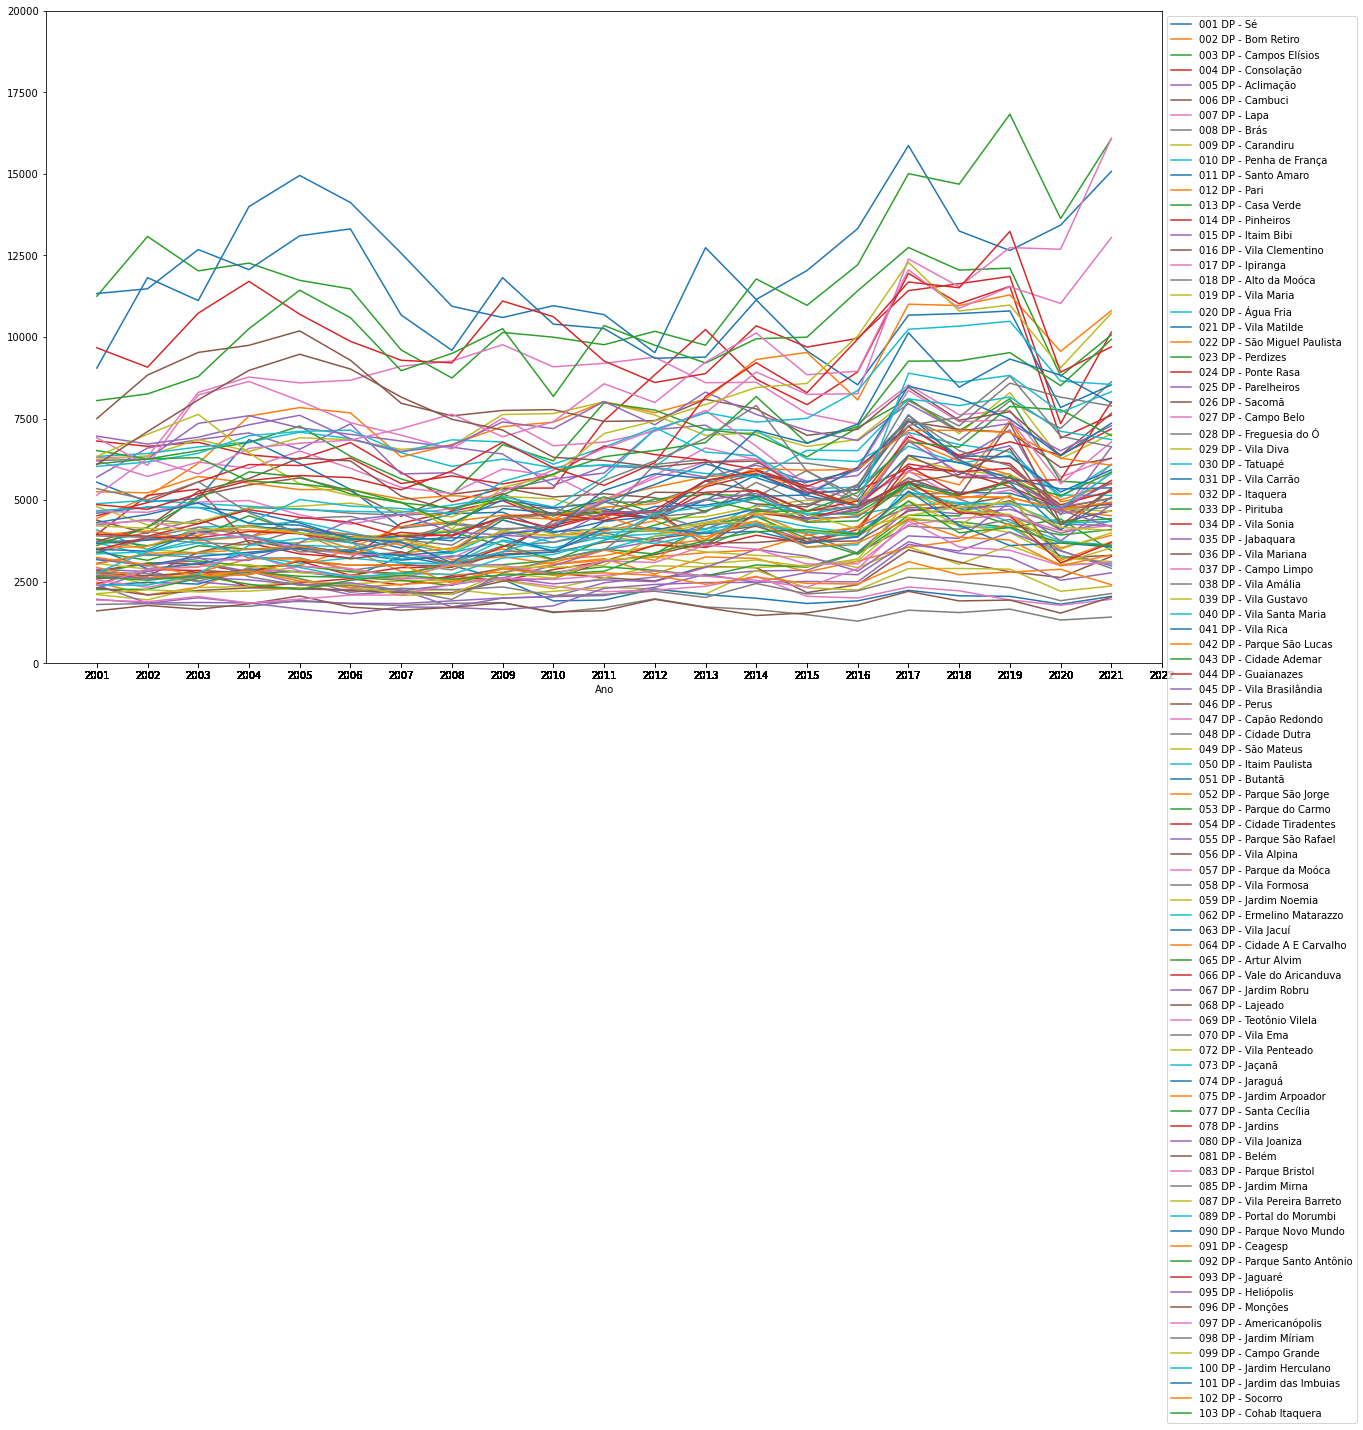

In [177]:
df.plot(figsize=(20,12), xticks=xint, ylim=(0,20000)).legend(bbox_to_anchor=(1.0, 1.0))